In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import geoplot
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np

data_path = r'.\data\Processed_data\processed_data.shp'
shape_data = gpd.read_file(data_path)
# shape_data.head(1)
# shape_data.info()

In [2]:
# check if still has missing data
shape_data[shape_data.isnull().values==True]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,distance,circle,COVID,population,BEDS,...,% Fair or,% Uninsure,Primary Ca,Preventabl,% Vaccinat,% Unemploy,Social Ass,Average Da,Life Expec,geometry
422,Shannon,South Dakota,46,113,46113,206327.093587,5,0,0.0,45.0,...,13.582869,13.212252,2137.140043297725,5097.122164,36.628486,3.482781,14.677685,5.952256,78.094864,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
1663,Bedford City,Virginia,51,515,51515,185666.412210,4,0,0.0,50.0,...,16.695872,11.292814,2821.874119452896,4809.796886,48.438430,3.388950,12.450078,8.951746,77.619836,"POLYGON ((-79.49441 37.33362, -79.49787 37.311..."


In [3]:
X_ols = pd.DataFrame(shape_data[[ 'population', 'Primary Ca',  'Social Ass','Preventabl','COVID', 'Life Expec','circle',
                                 '% Fair or','% Uninsure', '% Vaccinat', '% Unemploy', 'Average Da','health_out','health_beh','clinical_c' ]])
X_ols['Primary Ca'] = pd.to_numeric(X_ols['Primary Ca'])
X_ols['health_out'] = pd.to_numeric(X_ols['health_out'])
X_ols['health_beh'] = pd.to_numeric(X_ols['health_beh'])
X_ols['clinical_c'] = pd.to_numeric(X_ols['clinical_c'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_ols.values, i) for i in range(X_ols.shape[1])]
vif["features"] = X_ols.columns
vif.round(1)

,VIF Factor,features
0,1.4,population
1,2.8,Primary Ca
2,5.7,Social Ass
3,12.7,Preventabl
4,1.1,COVID
5,67.7,Life Expec
6,4.0,circle
7,39.4,% Fair or
8,12.7,% Uninsure
9,30.7,% Vaccinat


In [4]:
X_ols = pd.DataFrame(shape_data[[ 'population', 'Social Ass', 'Primary Ca',  'COVID', 'circle','health_out', 'health_beh', 'clinical_c' ]])
X_ols['Primary Ca'] = pd.to_numeric(X_ols['Primary Ca'])
X_ols['health_out'] = pd.to_numeric(X_ols['health_out'])
X_ols['health_beh'] = pd.to_numeric(X_ols['health_beh'])
X_ols['clinical_c'] = pd.to_numeric(X_ols['clinical_c'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_ols.values, i) for i in range(X_ols.shape[1])]
vif["features"] = X_ols.columns
vif.round(1)

,VIF Factor,features
0,1.2,population
1,2.7,Social Ass
2,2.3,Primary Ca
3,1.1,COVID
4,2.9,circle
5,8.0,health_out
6,6.9,health_beh
7,4.9,clinical_c


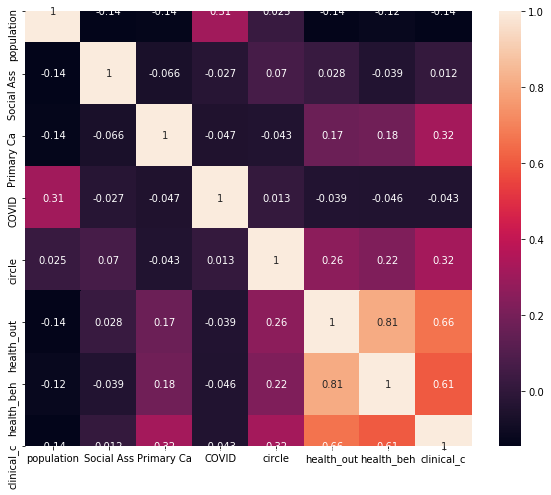

In [5]:
X_ols = pd.DataFrame(shape_data[[ 'population', 'Social Ass', 'Primary Ca',  'COVID', 
                                 'circle','health_out', 'health_beh', 'clinical_c' ]])

X_ols['health_out'] = pd.to_numeric(X_ols['health_out'])
X_ols['health_beh'] = pd.to_numeric(X_ols['health_beh'])
X_ols['clinical_c'] = pd.to_numeric(X_ols['clinical_c'])
X_ols['Primary Ca'] = pd.to_numeric(X_ols['Primary Ca'])

f=plt.figure(figsize=(10,8))
corrMatrix = X_ols.corr()
corrMatrix
sns.heatmap(corrMatrix, annot=True)

plt.savefig('pic/cor.png')
plt.show()

In [6]:
X_ols = pd.DataFrame(shape_data[[ 'population', 'Social Ass', 'Primary Ca',  'COVID', 
                                 'circle', 'health_beh', 'clinical_c' ]])

X_ols['Primary Ca'] = pd.to_numeric(X_ols['Primary Ca'])
#X_ols['health_out'] = pd.to_numeric(X_ols['health_out'])
X_ols['health_beh'] = pd.to_numeric(X_ols['health_beh'])
X_ols['clinical_c'] = pd.to_numeric(X_ols['clinical_c'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_ols.values, i) for i in range(X_ols.shape[1])]
vif["features"] = X_ols.columns
vif.round(1)

,VIF Factor,features
0,1.2,population
1,2.7,Social Ass
2,2.3,Primary Ca
3,1.1,COVID
4,2.9,circle
5,3.5,health_beh
6,4.3,clinical_c


                                 OLS Regression Results                                
Dep. Variable:                   BEDS   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                              3970.
Date:                Mon, 15 Jun 2020   Prob (F-statistic):                        0.00
Time:                        11:29:42   Log-Likelihood:                         -22729.
No. Observations:                3109   AIC:                                  4.547e+04
Df Residuals:                    3102   BIC:                                  4.551e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

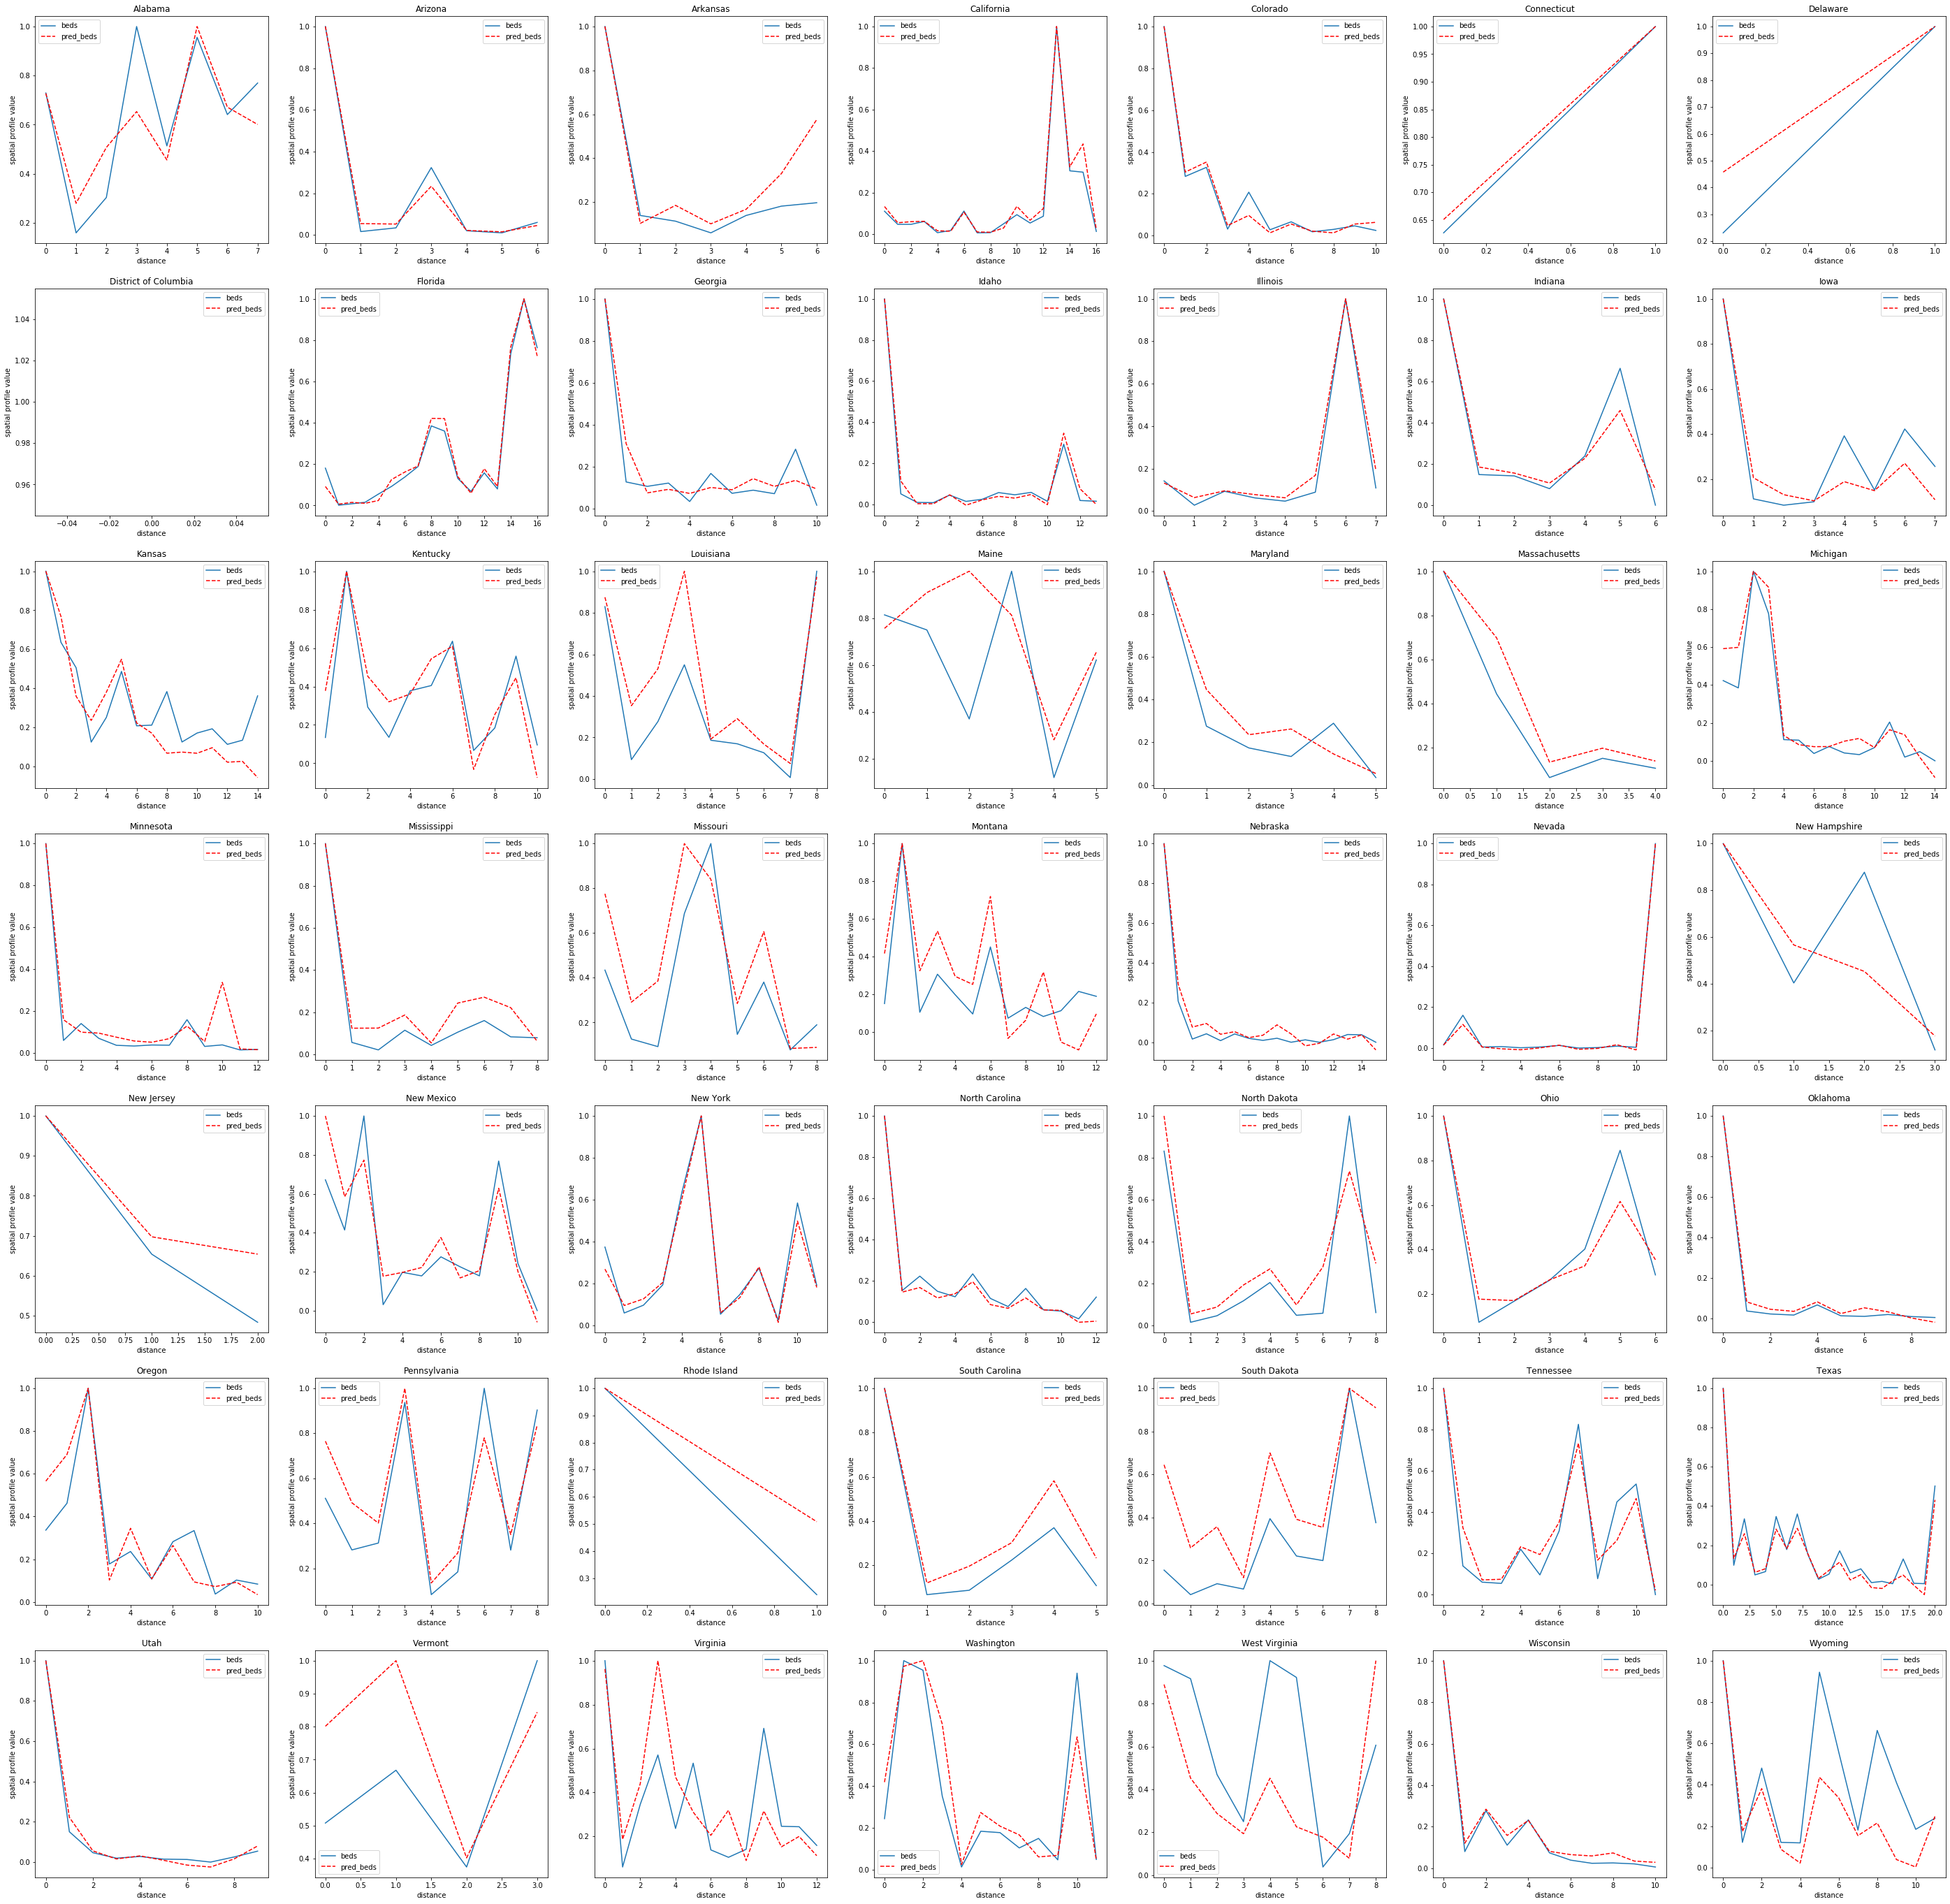

In [7]:
X_ols = pd.DataFrame(shape_data[[ 'population', 'Social Ass', 'Primary Ca',  
                                 'COVID', 'circle', 'health_beh', 'clinical_c' ]])
#'health_out','health_beh','clinical_c'
# Index(['const', 'population', 'Primary Ca', 'Social Ass', 'Preventabl',
#        'COVID', 'Life Expec', 'health_out', 'health_beh', 'clinical_c'],



#X_ols['health_out'] = pd.to_numeric(X_ols['health_out'])
X_ols['health_beh'] = pd.to_numeric(X_ols['health_beh'])
X_ols['clinical_c'] = pd.to_numeric(X_ols['clinical_c'])
X_ols['Primary Ca'] = pd.to_numeric(X_ols['Primary Ca'])


# X_ols = X_ols[['const', '% Fair or', 'population', 'Primary Ca', 'Social Ass',
#        'Preventabl', 'COVID', 'Life Expec', 'Rank']]

target = shape_data['BEDS']
ols_model = sm.OLS(target,X_ols)
res_ols = ols_model.fit()

#coefs_signif
print_model = res_ols.summary()
print(print_model)


# get statistically significant coefficients
feats_signif = res_ols.pvalues[res_ols.pvalues<0.05].index
coefs_signif = res_ols.params[feats_signif]
print(feats_signif)

predictions = res_ols.predict(X_ols)
shape_data['pred_beds']=predictions
circle_group_pred_beds = shape_data.groupby(["STATE_NAME","circle"])["pred_beds"].mean()
circle_group_bed = shape_data.groupby(["STATE_NAME","circle"])["BEDS"].mean()


## get the districution
bed_districution={}
for s in sorted(list(set(shape_data["STATE_NAME"]))):
    temp_state_bed= []
    for c in circle_group_bed[s].keys():
        temp_state_bed.append(circle_group_bed[s,c])
     
    bed_districution[s] = np.array(temp_state_bed)/max(temp_state_bed)


## get the districution
pred_beds_districution = {}
for s in sorted(list(set(shape_data["STATE_NAME"]))):
    temp_state_pred_beds = []
    for c in circle_group_bed[s].keys():
        temp_state_pred_beds.append(circle_group_pred_beds[s,c])
     
    pred_beds_districution[s] = np.array(temp_state_pred_beds)/max(temp_state_pred_beds)
    
    
%matplotlib inline
import matplotlib.pyplot as plt

states = sorted(list(set(shape_data["STATE_NAME"])))
f, ax = plt.subplots(7,7,figsize=(49,49))
ax = ax.flatten()
for i in range(len(states)):
    ax[i].plot(bed_districution[states[i]], label="beds")
    ax[i].plot(pred_beds_districution[states[i]], 'r--',label="pred_beds")
#    ax[i].fill_between(range(len(bed_districution[states[i]])), bed_districution[states[i]], pred_beds_districution[states[i]] )
    
    
    ax[i].set_xlabel('distance')
    ax[i].set_ylabel('spatial profile value')
    ax[i].set_title("{}".format(states[i]))
    ax[i].legend(loc="best")
f.savefig('pic/estimate.png')

In [8]:
# discrepancy
import numpy as np

def find_sign_change_array(a):
    asign = np.sign(a)
    sz = asign == 0
    if sz.any():
        asign[sz] = np.roll(asign, 1)[sz]
        sz = asign == 0
    signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
    signchange[0] = 0
    return signchange

def get_regions(a):
    sgn = find_sign_change_array(a)
    regs= []
    i = 0
    for j,s in enumerate(sgn):
        if s==1:
            regs += [(i,j,np.sign(a[i]))]
            i = j
    if i<j:
        regs += [(i,j,np.sign(a[i]))]
    return regs

def compute_discrepancy(source0, target0, weights=None):
    weights = np.ones(len(source0)) if weights is None else weights
    source = weights * source0
    target = weights * target0
    dif = source - target
    reg = get_regions(dif)
    top = np.array([max([i,j]) for i,j in zip(source,target)])
    tot_disc = dif.sum() /float(target.sum())
    disc=[]
    for (i,j,s) in reg:
        d = dif[i:j].sum() / float(top[i:j].sum())
        disc += [(i,j,d)]
    return tot_disc

# effort
from scipy.stats import wasserstein_distance

def compute_effort_emd(source, target, weights=None):
    return wasserstein_distance(source, target, u_weights=weights, v_weights=weights)

# calculate discrepancy and effort
discrepancy_bed_prebed = {}
effort_bed_prebed = {}
for s in bed_districution.keys():
    discr_bed_prebed = compute_discrepancy(bed_districution[s], pred_beds_districution[s])
    discrepancy_bed_prebed[s] = discr_bed_prebed
    
    eff_bed_prebed = compute_effort_emd(bed_districution[s], pred_beds_districution[s])   
    effort_bed_prebed[s] = eff_bed_prebed
    
ccc = pd.DataFrame.from_dict(discrepancy_bed_prebed, orient='index',columns=['discrepancy'])
ddd = pd.DataFrame.from_dict(effort_bed_prebed, orient='index',columns=['effort'])
ddd['discrepancy']=ccc['discrepancy']

In [9]:
ccc

,discrepancy
Alabama,0.035856
Arizona,0.029250
Arkansas,-0.256801
California,-0.108914
Colorado,0.019658
Connecticut,-0.014617
Delaware,-0.155251
District of Columbia,0.000000
Florida,-0.015369
Georgia,-0.058336


In [10]:
ddd

,effort,discrepancy
Alabama,0.090295,0.035856
Arizona,0.021270,0.029250
Arkansas,0.093222,-0.256801
California,0.018788,-0.108914
Colorado,0.021279,0.019658
Connecticut,0.012065,-0.014617
Delaware,0.113132,-0.155251
District of Columbia,0.000000,0.000000
Florida,0.010970,-0.015369
Georgia,0.020044,-0.058336


# evaluate


In [11]:
import os
evaluatepath = "./data/discr_eff/"
avaliable_bed = pd.read_csv(os.path.join(evaluatepath, "Summary_stats_all_locs.csv"),header=0)
avaliable_bed = avaliable_bed[["location_name", "available_all_nbr"]]
# avaliable_bed

healthrank_path = "./data/discr_eff/"
state_rank = pd.read_excel(os.path.join(healthrank_path, "stateRank.xlsx"),header=None)

# drop Alaska and Hawaii
state_rank = state_rank.drop([0,10])
state_rank = state_rank.reset_index(drop=True)
state_rank["OverallRank"] = state_rank[5].rank(method="min", ascending=False)
# state_rank

new_rank1 = gpd.GeoDataFrame()
new_rank1 = pd.merge(ddd, avaliable_bed, left_on = ddd.index, right_on=["location_name"], how="left")
new_rank1["bedRank"] = new_rank1["available_all_nbr"].rank(method="min", ascending=False)
new_rank1["discrRank"] = new_rank1["discrepancy"].rank(method="min", ascending=False)
new_rank1["effRank"] = new_rank1["effort"].rank(method="min", ascending=False)
# drop DC
new_rank1 = new_rank1.drop([7])
new_rank1 = new_rank1.reset_index(drop=True)

new_rank1 = pd.merge(new_rank1, state_rank[[3,"OverallRank"]],left_on = ["location_name"], right_on=[3], how="left")
# new_rank1

dis1 = list(new_rank1.discrRank)
eff1 = list(new_rank1.effRank)
bedrank = list(new_rank1.bedRank)
healthrank = list(new_rank1.OverallRank)

from scipy import stats
print("Bed Rank:")
print("discrepancy:")
print(stats.spearmanr(dis1, bedrank),stats.kendalltau(dis1, bedrank))
print("\n effort:")
print(stats.spearmanr(eff1, bedrank),stats.kendalltau(eff1, bedrank))

print("\nHealth Rank:")
print("discrepancy:")
print(stats.spearmanr(dis1, healthrank),stats.kendalltau(dis1, healthrank))
print("\n effort:")
print(stats.spearmanr(eff1, healthrank),stats.kendalltau(eff1, healthrank))

Bed Rank:
discrepancy:
SpearmanrResult(correlation=0.10660008684324793, pvalue=0.47082469323212695) KendalltauResult(correlation=0.056737588652482275, pvalue=0.5694684029957512)

 effort:
SpearmanrResult(correlation=-0.34237950499348674, pvalue=0.017217285736693982) KendalltauResult(correlation=-0.23226950354609932, pvalue=0.019876736209129223)

Health Rank:
discrepancy:
SpearmanrResult(correlation=0.016391663048198005, pvalue=0.9119505251218969) KendalltauResult(correlation=0.010638297872340427, pvalue=0.915061506100966)

 effort:
SpearmanrResult(correlation=-0.11810681719496308, pvalue=0.4239989562993557) KendalltauResult(correlation=-0.0797872340425532, pvalue=0.42375504465292513)


In [12]:
# load state boundary
import geopandas as gpd
import os
state_path = r'.\data\cb_2018_us_state_500k\cb_2018_us_state_500k.shp'
shape_state = gpd.read_file(state_path)
shape_state = shape_state[shape_state.NAME != 'Alaska']
shape_state = shape_state[shape_state.NAME != 'Hawaii']
shape_state = shape_state[shape_state.NAME != 'Commonwealth of the Northern Mariana Islands']
shape_state = shape_state[shape_state.NAME != 'United States Virgin Islands']
shape_state = shape_state[shape_state.NAME != 'Puerto Rico']
shape_state = shape_state[shape_state.NAME != 'Guam']
shape_state = shape_state[shape_state.NAME != 'American Samoa']

shape_state

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [13]:
# load capital location
path = './data/'
file_name = 'us-state-capitals.csv'
data = pd.read_csv(os.path.join(path, file_name))
# data
from shapely.geometry import Point
"""函数的传入参数根据axis来定，比如axis = 1，就会把一行数据作为Series的数据 
结构传入给自己实现的函数中，我们在函数中实现对Series不同属性之间的计算，返回一个结果，则apply函数 
会自动遍历每一行DataFrame的数据，最后将所有结果组合成一个Series数据结构并返回"""
col_name = ["longitude","latitude"]
#Point是一个函数
data["geometry"] = data.apply(lambda x: Point(x[col_name]),axis=1)
captial_data = gpd.GeoDataFrame(data)
captial_data.head()
captial_data = captial_data[captial_data.name != 'Alaska']
captial_data = captial_data[captial_data.name != 'Hawaii']
captial_data = captial_data[captial_data.name != 'Commonwealth of the Northern Mariana Islands']
captial_data = captial_data[captial_data.name != 'United States Virgin Islands']
captial_data = captial_data[captial_data.name != 'Puerto Rico']
captial_data = captial_data[captial_data.name != 'Guam']
captial_data = captial_data[captial_data.name != 'American Samoa']

In [14]:

integrate = pd.merge(shape_state[shape_state.NAME != 'District of Columbia'], ddd, left_on=["NAME"], right_on=ddd.index,how="left")
integrate['judge'] = integrate.apply(lambda x: np.sign(x.discrepancy), axis = 1)
integrate

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,effort,discrepancy,judge
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",0.069487,-0.272732,-1.0
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",0.025660,0.154747,1.0
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",0.019794,-0.101831,-1.0
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",0.061131,-0.061146,-1.0
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",0.188528,0.430467,1.0
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",0.135340,-0.273271,-1.0
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",0.061486,-0.165713,-1.0
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",0.080620,-0.185971,-1.0
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",0.014823,-0.037273,-1.0
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",0.010970,-0.015369,-1.0


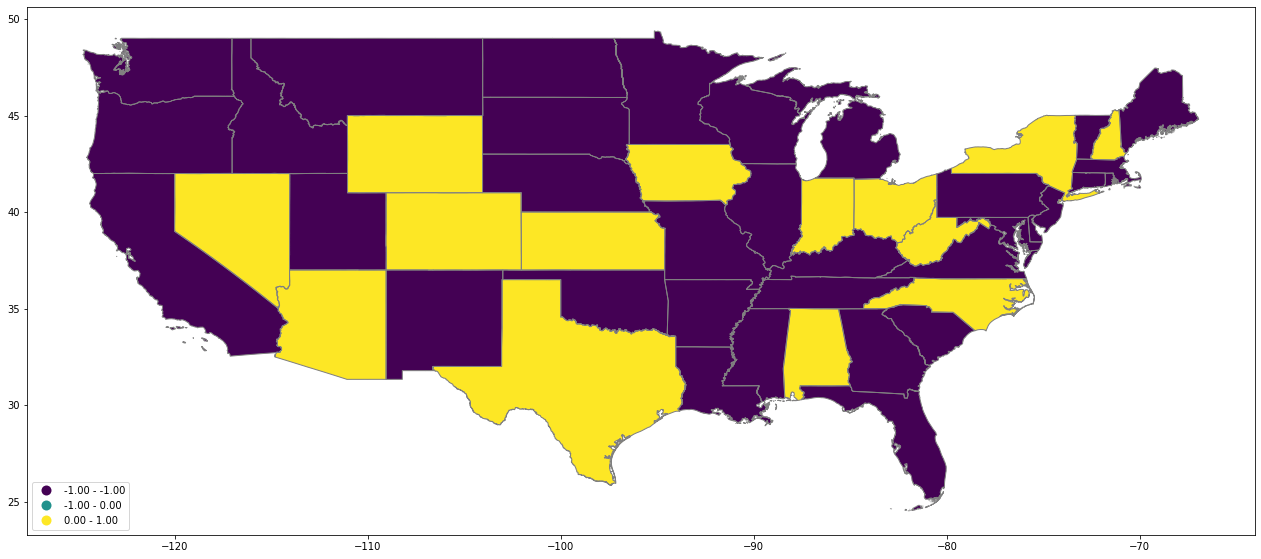

In [15]:
base = integrate.plot(column='judge', cmap='viridis',scheme='User_Defined',classification_kwds=dict(bins=[-1,0,1]), figsize=(22,10), legend=True, legend_kwds=dict(loc='lower left',  frameon=True))
shape_state.plot(ax=base, color='none', edgecolor='grey')
plt.savefig("./pic/judge_pred.png")

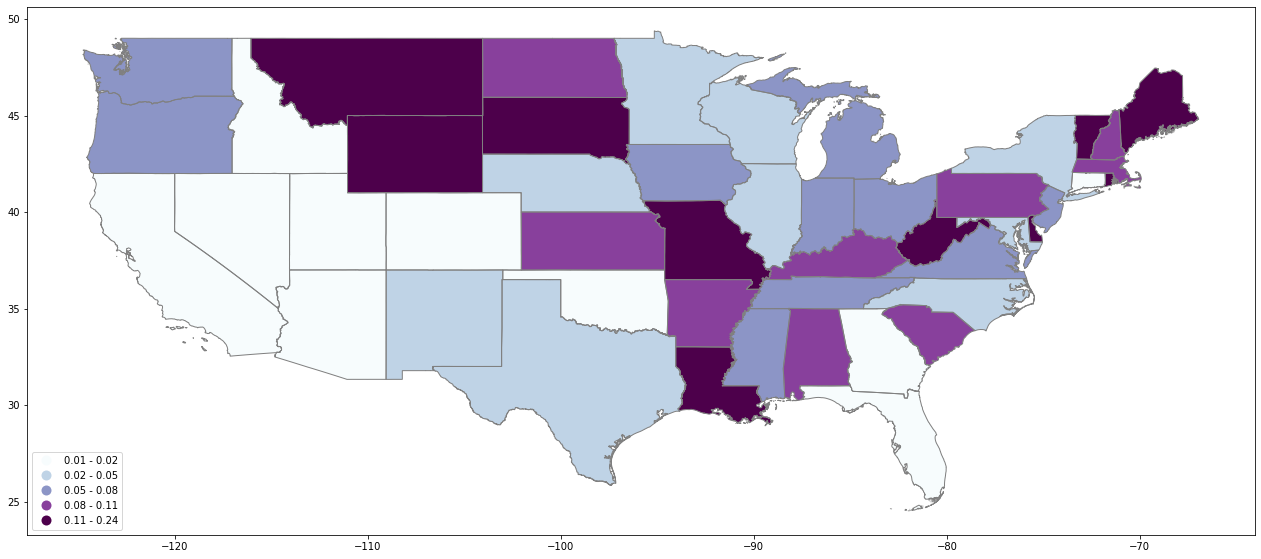

In [16]:
base = integrate.plot(column='effort', cmap='BuPu',scheme='quantiles',figsize=(22,10), legend=True, legend_kwds=dict(loc='lower left',  frameon=True))
shape_state.plot(ax=base, color='none', edgecolor='grey')
plt.savefig("./pic/eff_pred.png")